In [1]:
import pandas as pd

In [2]:
my_data = pd.read_csv('hr.csv')
my_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [4]:
my_data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [5]:
data_columns=['satisfaction_level', 'last_evaluation','number_project', 'average_montly_hours','time_spend_company', 'Work_accident', 'left','promotion_last_5years']
for cols in data_columns:
    col_val = [float(w) for w in my_data[cols]]
    num_score = len(col_val)
    sorted_cols = sorted(col_val)
    middle = (num_score // 2) + 0.5
    middle=int(middle)
    print('mediana:{:.2f}'.format(sorted_cols[middle]))

mediana:0.64
mediana:0.72
mediana:4.00
mediana:200.00
mediana:3.00
mediana:0.00
mediana:0.00
mediana:0.00


In [6]:
for cols in data_columns:
    col_val = [float(w) for w in my_data[cols]]
    counts = {}
    for p in col_val:
        if p not in counts:
            counts[p] = 1
        else:
            counts[p] += 1

    maxp = 0
    mode = None
    for k, v in counts.items():
        if maxp < v:
            maxp = v
            mode = k
    print('mode {:}: {:}'.format(cols,mode))

mode satisfaction_level: 0.1
mode last_evaluation: 0.55
mode number_project: 4.0
mode average_montly_hours: 135.0
mode time_spend_company: 3.0
mode Work_accident: 0.0
mode left: 0.0
mode promotion_last_5years: 0.0


In [7]:
corr_my_data = my_data.corr()
corr_my_data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


In [8]:
import seaborn as sns

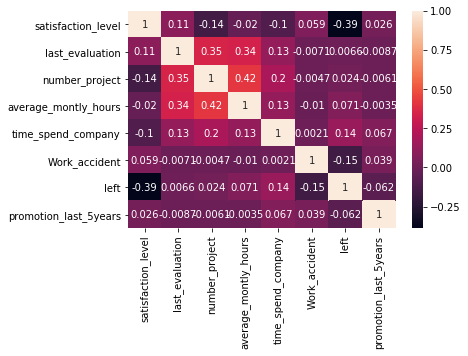

In [9]:
sns.heatmap(corr_my_data, annot=True,
            xticklabels=corr_my_data.columns.values,
            yticklabels=corr_my_data.columns.values)

In [10]:
from scipy import stats

In [11]:
left_number_proj = my_data[my_data['left']==1]['number_project']
not_left_number_proj = my_data[my_data['left']==0]['number_project']

stats.ttest_ind(left_number_proj, not_left_number_proj) 

Ttest_indResult(statistic=2.9138564358459607, pvalue=0.0035752138709418788)

In [12]:
left_satis_level = my_data[my_data['left']==1]['average_montly_hours']
not_left_satis_level = my_data[my_data['left']==0]['average_montly_hours']

stats.ttest_ind(left_satis_level, not_left_satis_level) 

Ttest_indResult(statistic=8.752254731850009, pvalue=2.3113035567540143e-18)

In [13]:
left_satis_level = my_data[my_data['left']==1]['satisfaction_level']
not_left_satis_level = my_data[my_data['left']==0]['satisfaction_level']

stats.ttest_ind(left_satis_level, not_left_satis_level) 

Ttest_indResult(statistic=-51.61280155890104, pvalue=0.0)

In [14]:
my_data.groupby('sales').count()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary
sales,,,,,,,,,
IT,1227,1227,1227,1227,1227,1227,1227,1227,1227
RandD,787,787,787,787,787,787,787,787,787
accounting,767,767,767,767,767,767,767,767,767
hr,739,739,739,739,739,739,739,739,739
management,630,630,630,630,630,630,630,630,630
marketing,858,858,858,858,858,858,858,858,858
product_mng,902,902,902,902,902,902,902,902,902
sales,4140,4140,4140,4140,4140,4140,4140,4140,4140
support,2229,2229,2229,2229,2229,2229,2229,2229,2229


In [15]:
my_data.groupby('left').count()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales,salary
left,,,,,,,,,
0,11428,11428,11428,11428,11428,11428,11428,11428,11428
1,3571,3571,3571,3571,3571,3571,3571,3571,3571


In [16]:
corr_my_data = my_data.corr()
corr_my_data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


In [17]:
from scipy import stats

In [18]:
left_employees = my_data[my_data['left'] == 1]['time_spend_company']

stats.ttest_1samp(left_employees, 0)

Ttest_1sampResult(statistic=236.93575532976504, pvalue=0.0)

In [19]:
my_data['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

In [20]:
def var_salary (row):
    if row['salary'] == 'low':
        salary_rasp = 1
    elif row['salary'] == 'medium':
        salary_rasp = 2
    else:
        salary_rasp = 3
    return salary_rasp

In [21]:
my_data['salary_rasp'] = my_data.apply(var_salary, axis=1)
my_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary,salary_rasp
0,0.38,0.53,2,157,3,0,1,0,sales,low,1
1,0.80,0.86,5,262,6,0,1,0,sales,medium,2
2,0.11,0.88,7,272,4,0,1,0,sales,medium,2
3,0.72,0.87,5,223,5,0,1,0,sales,low,1
4,0.37,0.52,2,159,3,0,1,0,sales,low,1


In [22]:
rate=0.3
n=my_data['salary_rasp']
y=stats.poisson.pmf(n,rate)
y

array([0.22224547, 0.03333682, 0.03333682, ..., 0.22224547, 0.22224547,
       0.22224547])

In [23]:
import random
import numpy as np
import pandas as pd
from scipy import stats
from scipy.stats import kurtosis
from scipy.stats import skew

import seaborn
import matplotlib.pyplot as plt
%matplotlib inline  

Text(0,0.5,'Вероятность')

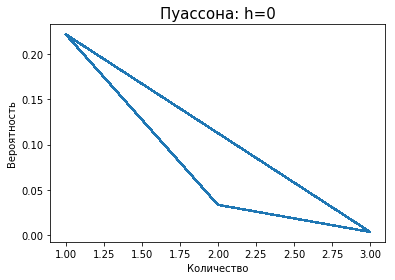

In [24]:
plt.plot(n,y)
plt.title('Пуассона: h=%i' % rate, fontsize=15)
plt.xlabel('Количество')
plt.ylabel ('Вероятность')

Text(0,0.5,'Вероятность')

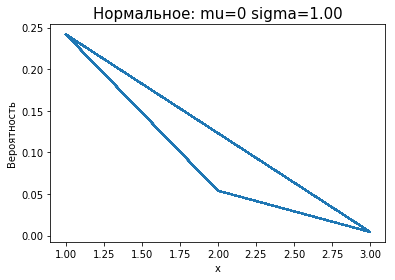

In [25]:
mu=0
sigma=1
x=my_data['salary_rasp']

y=stats.norm.pdf(x,mu,sigma)

plt.plot(x,y)
plt.title('Нормальное: mu=%i sigma=%.2f' % (mu,sigma), fontsize=15)
plt.xlabel('x')
plt.ylabel ('Вероятность')

In [26]:
salary_mean = [float(w) for w in my_data['salary_rasp']]

sum_score = sum(salary_mean)
num_score = len(salary_mean)
avg_score = sum_score/num_score
avg_score

1.5947063137542503

In [27]:
def stdev(nums):
    diffs = 0
    avg = sum(nums)/len(nums)
    for n in nums:
        diffs += (n - avg)**(2)
    return (diffs/(len(nums)-1))**(0.5)

In [28]:
std_salary = stdev(salary_mean)

In [29]:
std_salary

0.6371829504696128

Text(0,0.5,'Вероятность')

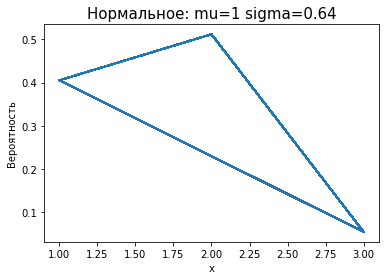

In [30]:
mu=avg_score
sigma=std_salary
x=my_data['salary_rasp']

y=stats.norm.pdf(x,mu,sigma)

plt.plot(x,y)
plt.title('Нормальное: mu=%i sigma=%.2f' % (mu,sigma), fontsize=15)
plt.xlabel('x')
plt.ylabel ('Вероятность')

In [31]:
disp_salary = std_salary**2

In [32]:
n=my_data['salary_rasp']
y=stats.poisson.pmf(n,disp_salary)
y

array([0.27052276, 0.05491641, 0.05491641, ..., 0.27052276, 0.27052276,
       0.27052276])

Text(0,0.5,'Вероятность')

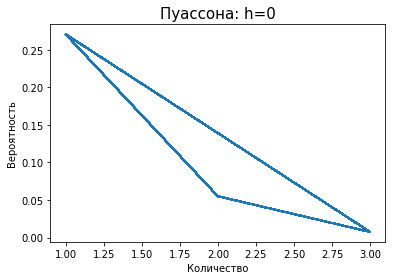

In [33]:
plt.plot(n,y)
plt.title('Пуассона: h=%i' % disp_salary, fontsize=15)
plt.xlabel('Количество')
plt.ylabel ('Вероятность')

Text(0,0.5,'Вероятность')

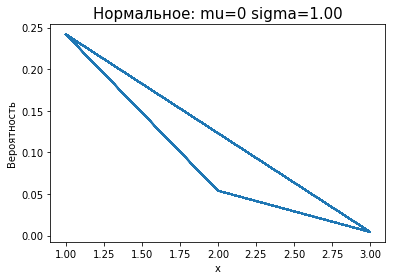

In [35]:
mu=0
sigma=1
x=my_data[my_data['sales'] == 'sales']['salary_rasp']

y=stats.norm.pdf(x,mu,sigma)

plt.plot(x,y)
plt.title('Нормальное: mu=%i sigma=%.2f' % (mu,sigma), fontsize=15)
plt.xlabel('x')
plt.ylabel ('Вероятность')

In [34]:
my_data['sales'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

Text(0,0.5,'Вероятность')

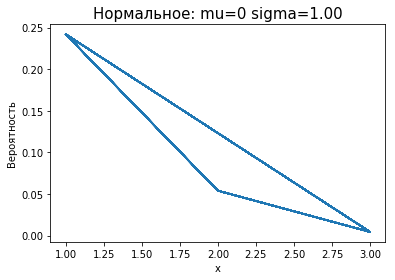

In [36]:
mu=0
sigma=1
x=my_data[my_data['sales'] == 'accounting']['salary_rasp']

y=stats.norm.pdf(x,mu,sigma)

plt.plot(x,y)
plt.title('Нормальное: mu=%i sigma=%.2f' % (mu,sigma), fontsize=15)
plt.xlabel('x')
plt.ylabel ('Вероятность')

Text(0,0.5,'Вероятность')

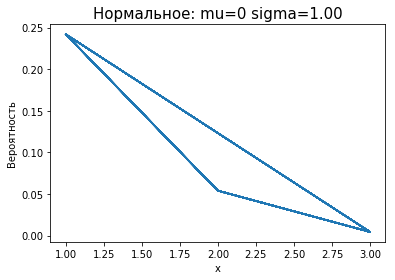

In [37]:
mu=0
sigma=1
x=my_data[my_data['sales'] == 'hr']['salary_rasp']

y=stats.norm.pdf(x,mu,sigma)

plt.plot(x,y)
plt.title('Нормальное: mu=%i sigma=%.2f' % (mu,sigma), fontsize=15)
plt.xlabel('x')
plt.ylabel ('Вероятность')

Text(0,0.5,'Вероятность')

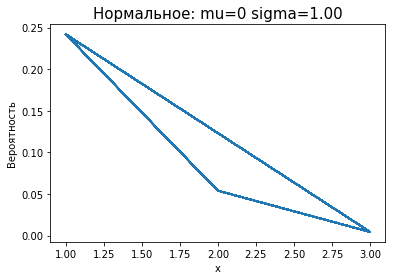

In [38]:
mu=0
sigma=1
x=my_data[my_data['sales'] == 'technical']['salary_rasp']

y=stats.norm.pdf(x,mu,sigma)

plt.plot(x,y)
plt.title('Нормальное: mu=%i sigma=%.2f' % (mu,sigma), fontsize=15)
plt.xlabel('x')
plt.ylabel ('Вероятность')

Text(0,0.5,'Вероятность')

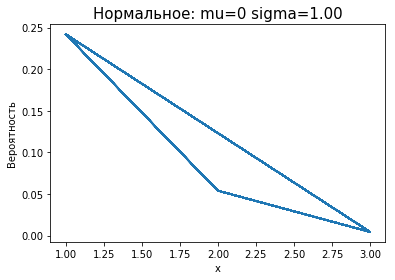

In [39]:
mu=0
sigma=1
x=my_data[my_data['sales'] == 'support']['salary_rasp']

y=stats.norm.pdf(x,mu,sigma)

plt.plot(x,y)
plt.title('Нормальное: mu=%i sigma=%.2f' % (mu,sigma), fontsize=15)
plt.xlabel('x')
plt.ylabel ('Вероятность')

Text(0,0.5,'Вероятность')

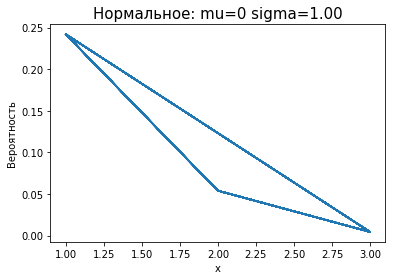

In [40]:
mu=0
sigma=1
x=my_data[my_data['sales'] == 'management']['salary_rasp']

y=stats.norm.pdf(x,mu,sigma)

plt.plot(x,y)
plt.title('Нормальное: mu=%i sigma=%.2f' % (mu,sigma), fontsize=15)
plt.xlabel('x')
plt.ylabel ('Вероятность')

Text(0,0.5,'Вероятность')

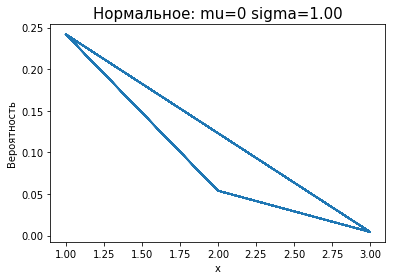

In [41]:
mu=0
sigma=1
x=my_data[my_data['sales'] == 'IT']['salary_rasp']

y=stats.norm.pdf(x,mu,sigma)

plt.plot(x,y)
plt.title('Нормальное: mu=%i sigma=%.2f' % (mu,sigma), fontsize=15)
plt.xlabel('x')
plt.ylabel ('Вероятность')

Text(0,0.5,'Вероятность')

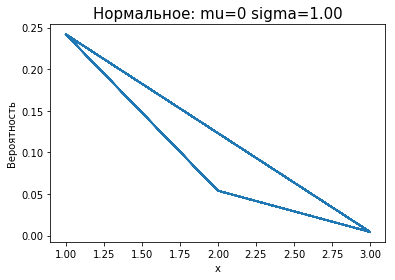

In [42]:
mu=0
sigma=1
x=my_data[my_data['sales'] == 'product_mng']['salary_rasp']

y=stats.norm.pdf(x,mu,sigma)

plt.plot(x,y)
plt.title('Нормальное: mu=%i sigma=%.2f' % (mu,sigma), fontsize=15)
plt.xlabel('x')
plt.ylabel ('Вероятность')

Text(0,0.5,'Вероятность')

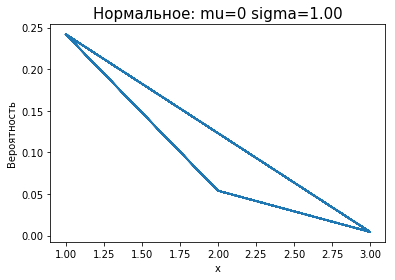

In [43]:
mu=0
sigma=1
x=my_data[my_data['sales'] == 'marketing']['salary_rasp']

y=stats.norm.pdf(x,mu,sigma)

plt.plot(x,y)
plt.title('Нормальное: mu=%i sigma=%.2f' % (mu,sigma), fontsize=15)
plt.xlabel('x')
plt.ylabel ('Вероятность')

In [49]:
my_data.groupby('left').count()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales,salary,salary_rasp
left,,,,,,,,,,
0,11428,11428,11428,11428,11428,11428,11428,11428,11428,11428
1,3571,3571,3571,3571,3571,3571,3571,3571,3571,3571


In [50]:
left_number_proj = my_data[my_data['left']==1]['number_project']
not_left_number_proj = my_data[my_data['left']==0]['number_project']

stats.ttest_ind(left_number_proj, not_left_number_proj) 

Ttest_indResult(statistic=2.9138564358459607, pvalue=0.0035752138709418788)

In [51]:
left_montly_hours = my_data[my_data['left']==1]['average_montly_hours']
not_left_montly_hours = my_data[my_data['left']==0]['average_montly_hours']

stats.ttest_ind(left_montly_hours, not_left_montly_hours) 

Ttest_indResult(statistic=8.752254731850009, pvalue=2.3113035567540143e-18)

In [ ]:
left_salary = my_data[my_data['left']==1]['salary_resp']
not_left_salary = my_data[my_data['left']==0]['salary_resp']

stats.ttest_ind(left_montly_hours, not_left_montly_hours) 